#Import the required libraries

In [2]:
# Import the data analysis libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from termcolor import colored

# Import the machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

#Load the train and test dataset form Github

In [3]:
# Load the train dataset
train_data = "https://raw.githubusercontent.com/7PAM2015-0105-2023-Group15/Kaggle-Challenge/main/train.csv"
df_train = pd.read_csv(train_data)
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
print('Statistics of train dataset:-')
df_train.iloc[:, :-1].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap="ocean")\
                     .bar(subset=["max"], color='#0080ff')\
                     .bar(subset=["mean",], color='#ffff00')\
                     .set_properties(**{'color': 'black', 'text-align': 'center'})

Statistics of train dataset:-


,count,mean,std,min,25%,50%,75%,max
FoodCourt,8510.000000,458.077203,1611.489240,0.000000,0.000000,0.000000,76.000000,29813.000000
VRDeck,8505.000000,304.854791,1145.717189,0.000000,0.000000,0.000000,46.000000,24133.000000
Spa,8510.000000,311.138778,1136.705535,0.000000,0.000000,0.000000,59.000000,22408.000000
RoomService,8512.000000,224.687617,666.717663,0.000000,0.000000,0.000000,47.000000,14327.000000
ShoppingMall,8485.000000,173.729169,604.696458,0.000000,0.000000,0.000000,27.000000,23492.000000
Age,8514.000000,28.827930,14.489021,0.000000,19.000000,27.000000,38.000000,79.000000


In [6]:
# Load the test dataset
test_data = "https://raw.githubusercontent.com/7PAM2015-0105-2023-Group15/Kaggle-Challenge/main/test.csv"
df_test = pd.read_csv(test_data)
df_test1 = df_test.copy()
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [8]:
print('Statistics of test dataset:-')
df_test.iloc[:, :-1].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap="ocean")\
                     .bar(subset=["max"], color='#0080ff')\
                     .bar(subset=["mean",], color='#ffff00')\
                     .set_properties(**{'color': 'black', 'text-align': 'center'})

Statistics of test dataset:-


,count,mean,std,min,25%,50%,75%,max
FoodCourt,4171.000000,439.484296,1527.663045,0.000000,0.000000,0.000000,78.000000,25273.000000
VRDeck,4197.000000,310.710031,1246.994742,0.000000,0.000000,0.000000,36.000000,22272.000000
Spa,4176.000000,303.052443,1117.186015,0.000000,0.000000,0.000000,50.000000,19844.000000
RoomService,4195.000000,219.266269,607.011289,0.000000,0.000000,0.000000,53.000000,11567.000000
ShoppingMall,4179.000000,177.295525,560.821123,0.000000,0.000000,0.000000,33.000000,8292.000000
Age,4186.000000,28.658146,14.179072,0.000000,19.000000,26.000000,37.000000,79.000000


#Data Description

Data Cleaning


+ Categorical and Numerical features in dataset
+ Available Data Types in datsset
+ None, blank or empty values in dataset


In [9]:
# Column with Categorical Variables
print("Categorical Variables:-")
categorical_variables = df_train.select_dtypes(include=['object']).columns
for col in categorical_variables:
    print(col)

Categorical Variables:-
PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [10]:
# Check the NULL value in train data set
def get_nulls(df_train):
    dict_nulls = {}
    for col in  df_train.columns:
        dict_nulls[col]=df_train[col].isnull().sum()

    df_nulls = pd.DataFrame(data=list(dict_nulls.values()),
                            index=list(dict_nulls.keys()),
                            columns=['#nulls in train dataset'])
    return df_nulls

get_nulls(df_train)

,#nulls in train dataset
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


In [11]:
# Checking the NULL value in test data set
def get_nulls(df_train):
    dict_nulls = {}
    for col in  df_train.columns:
        dict_nulls[col]=df_train[col].isnull().sum()

    df_nulls = pd.DataFrame(data=list(dict_nulls.values()),
                            index=list(dict_nulls.keys()),
                            columns=['#nulls in test dataset'])
    return df_nulls

get_nulls(df_train)

,#nulls in test dataset
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


# Exploratory Data Analysis (EDA)

In [702]:
# Column wise Null Value Distribution
test_null = pd.DataFrame(df_test.isna().sum())
test_null = test_null.sort_values(by = 0 ,ascending = False)
train_null = pd.DataFrame(df_train.isna().sum())
train_null = train_null.sort_values(by = 0 ,ascending = False)[:-1]

# Specify the color for the bars
bar_color = '#5733FF'

fig = make_subplots(rows=1, cols=2,column_titles = ["Null Value in train Data", "Null Value in test Data"] ,
                    x_title="Missing Values in dataset")

fig.add_trace(go.Bar(x=train_null[0], y=train_null.index, orientation="h",
                    marker=dict(color=[n for n in range(12)], line_color='black',
                                line_width = 1, coloraxis="coloraxis")), 1, 1)
fig.add_trace(go.Bar(x=test_null[0], y=test_null.index, orientation="h",
                    marker=dict(color=[n for n in range(12)], line_color='black',
                                line_width = 1, coloraxis="coloraxis")), 1, 2)

fig.update_layout(showlegend=False, title_text="Column wise Null Value Distribution")

In [722]:
# Missing values in train dataset (%)
missing=(df_train.isnull().mean().sort_values(ascending=True)*100).reset_index()
missing.rename(columns={0:"Average"},inplace=True)
missing.head()

fig=px.histogram(missing,x="Average",y="index",title="<b><i> Missing values in train dataset (%)",
                 color="index", labels={"Average":"%age of missing values","index":"Column Names"})

fig.update_layout(font_color="black", font_size=12, title_font_color="dimgrey", legend_title_font_color="black",
                  legend_title_font_size=20, template="plotly_white", title_font_size=30)

fig.update_layout(xaxis_title = "Values in percentage",xaxis_title_font_size=20,
                  yaxis_title="Column Name",yaxis_title_font_size=20,title_x=0.5)
fig.show()

In [723]:
# Missing values in test dataset (%)
missing=(df_test.isnull().mean().sort_values(ascending=True)*100).reset_index()
missing.rename(columns={0:"Average"},inplace=True)
missing.head()

fig=px.histogram(missing,x="Average",y="index",title="<b><i> Missing values in test dataset (%)",
                 color="index", labels={"Average":"%age of missing values","index":"Column Names"})

fig.update_layout(font_color="black", font_size=12, title_font_color="dimgrey", legend_title_font_color="black",
                  legend_title_font_size=20, template="plotly_white", title_font_size=30)

fig.update_layout(xaxis_title = "Values in percentage",xaxis_title_font_size=20,
                  yaxis_title="Column Name",yaxis_title_font_size=20,title_x=0.5)
fig.show()

Bar plots for categorical fetures in train dataset

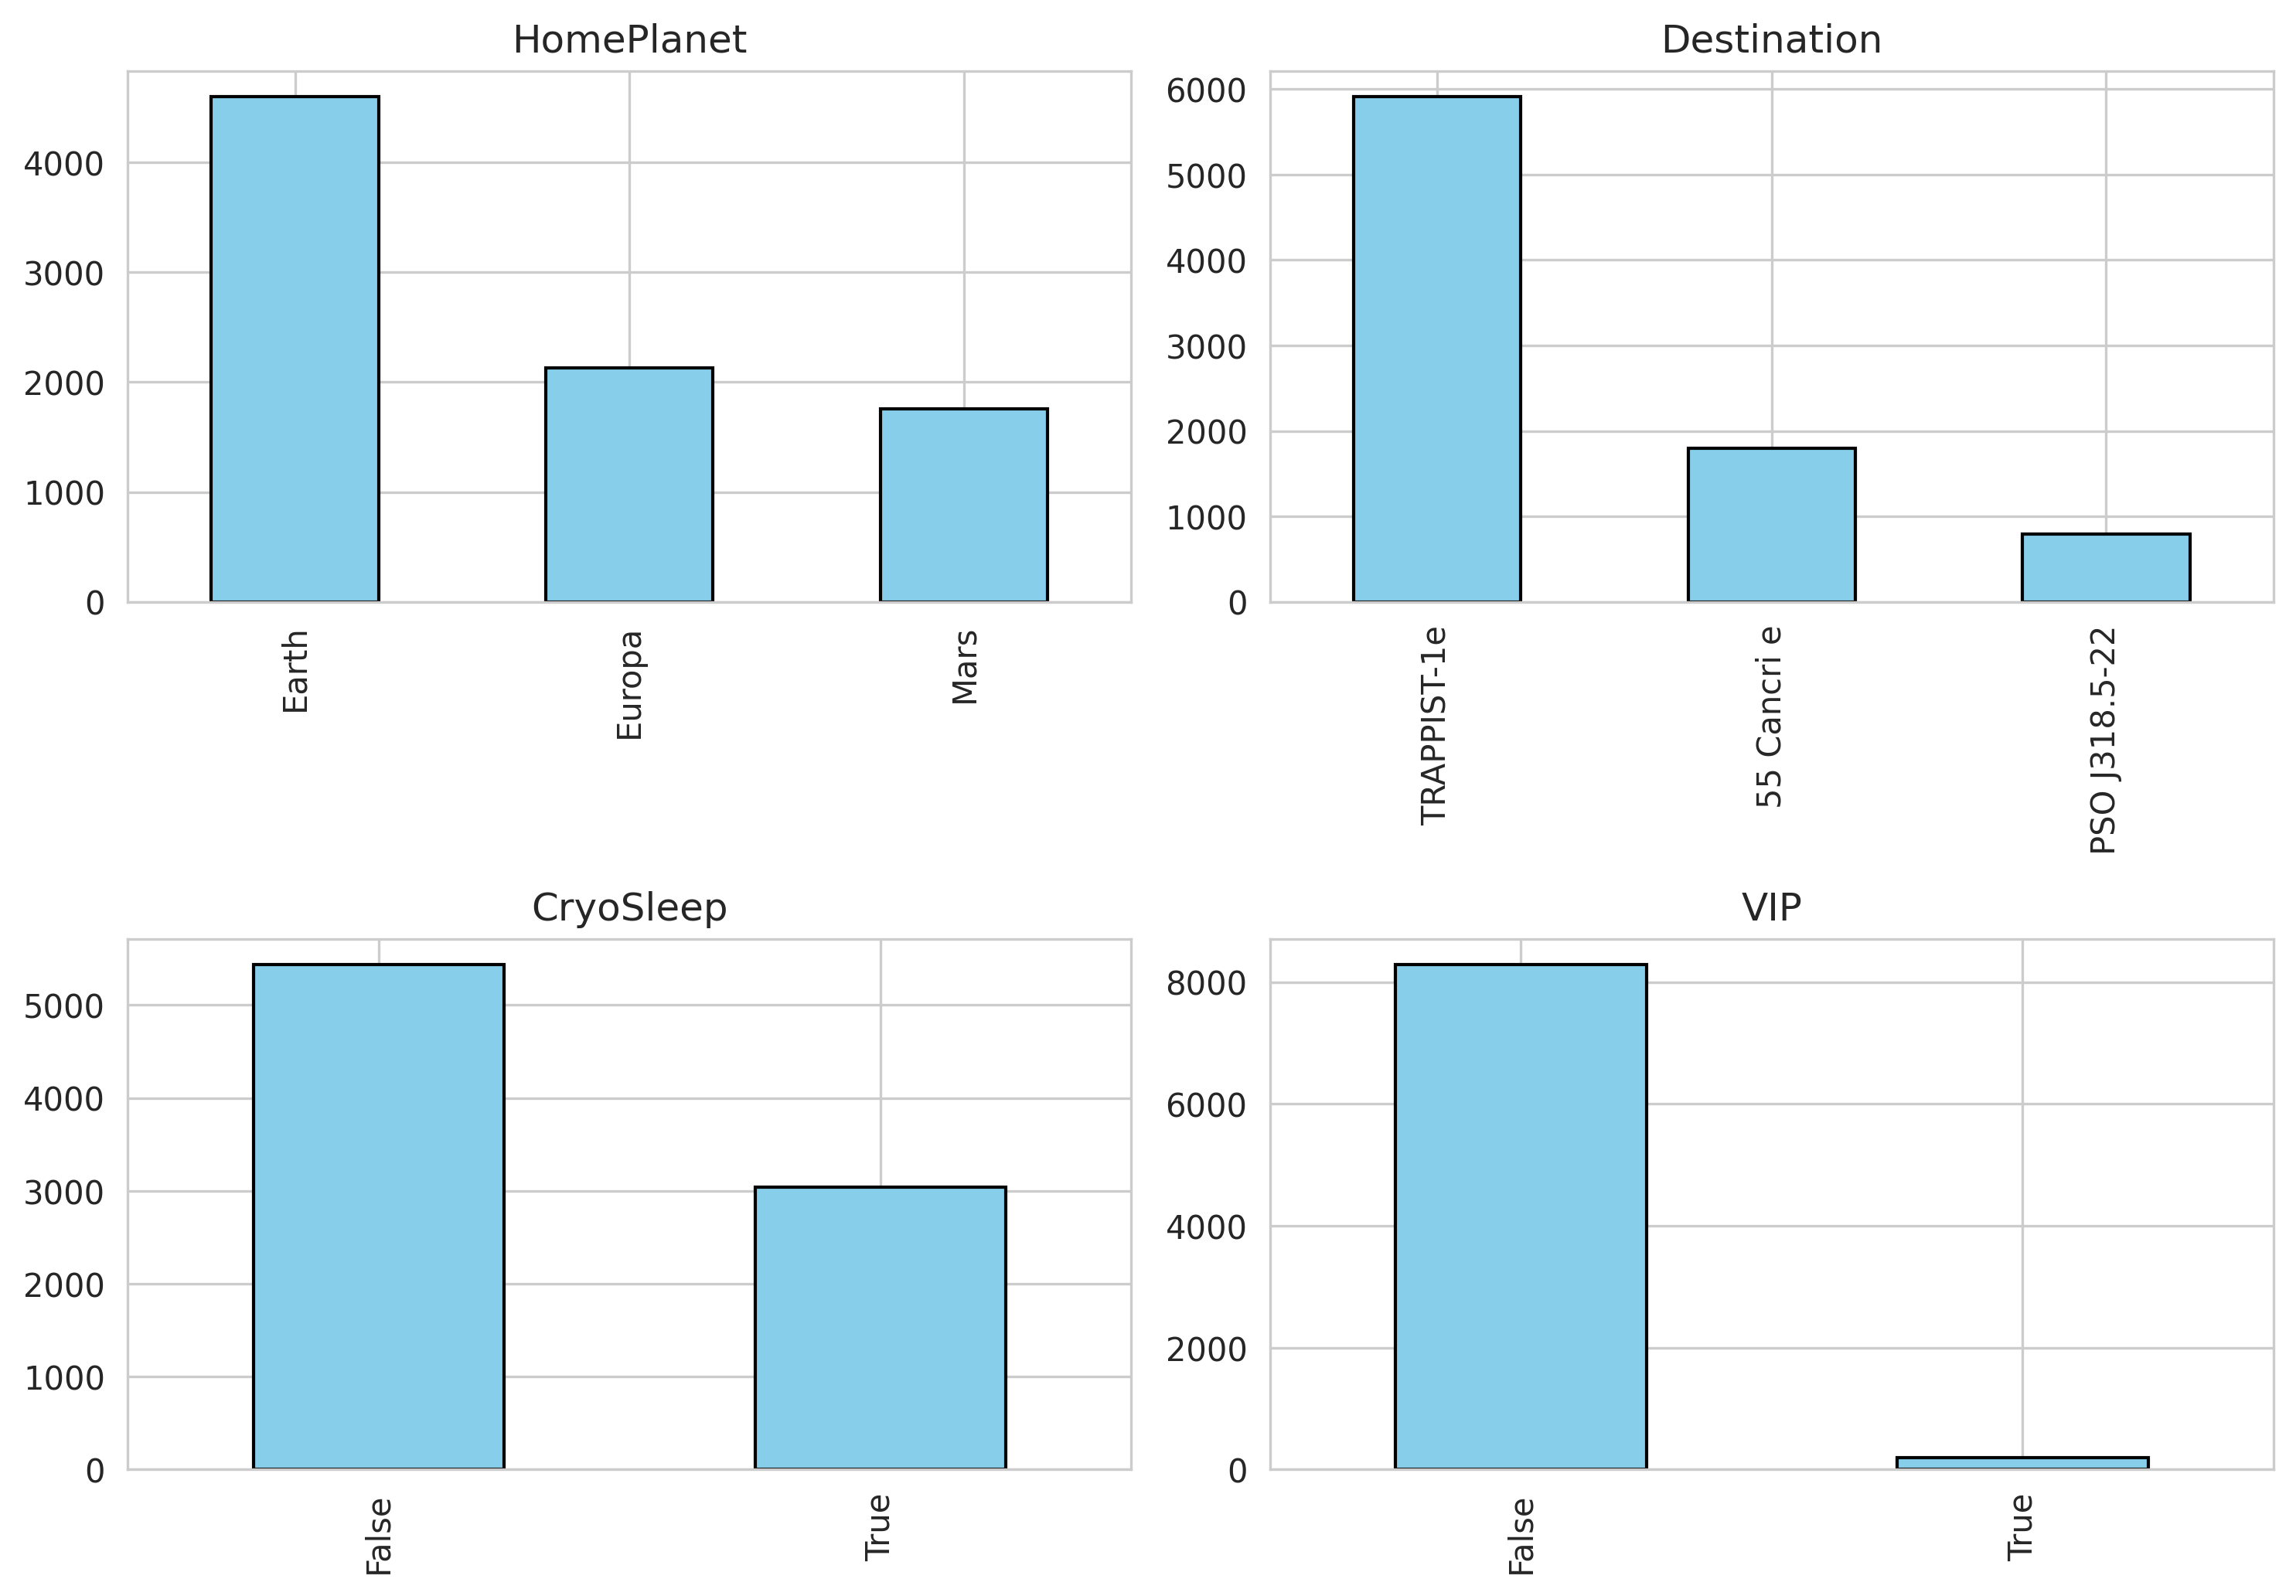

In [725]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
df_train['HomePlanet'].value_counts().plot(kind='bar', title='HomePlanet', color='Skyblue', edgecolor='black')
plt.subplot(2,2,2)
df_train['Destination'].value_counts().plot(kind='bar', title='Destination', color='Skyblue', edgecolor='black')
plt.subplot(2,2,3)
df_train['CryoSleep'].value_counts().plot(kind='bar', title='CryoSleep', color='Skyblue', edgecolor='black')
plt.subplot(2,2,4)
df_train['VIP'].value_counts().plot(kind='bar',title='VIP', color='Skyblue', edgecolor='black')
plt.tight_layout()
plt.gcf().set_dpi(300);

Correlation matrix

In [706]:
fig = px.imshow(df_train.corr() ,text_auto=True, aspect="auto" , color_continuous_scale = "viridis")
plt.gcf().set_dpi(300)
fig.show()

<ipython-input-706-65d0be9c0522>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Figure size 1920x1440 with 0 Axes>

# EDA with Target Feature (Transported)

In [707]:
# Define a function for the co-relation of particular feature to target feature (Transported)
def cor_fun(column):
  df1 = pd.DataFrame(df_train[column].value_counts() / sum(df_train[column].value_counts()))
  df2 = pd.DataFrame(df_train[df_train['Transported'] == 1 ][column].value_counts() / sum(df_train[df_train['Transported'] == 1 ][column].value_counts()))
  df1 = df1*100
  df2 = df2*100
  df3 = df2 - df1
  df_final = pd.concat([df1,df2,df3], axis=1)
  df_final.columns = [f'% {column} ', f'% {column} Transported', 'Difference']
  return df_final.T

HomePlanet Distribution:-
  HomePlanet  Count
0      Earth   4602
1     Europa   2131
2       Mars   1759


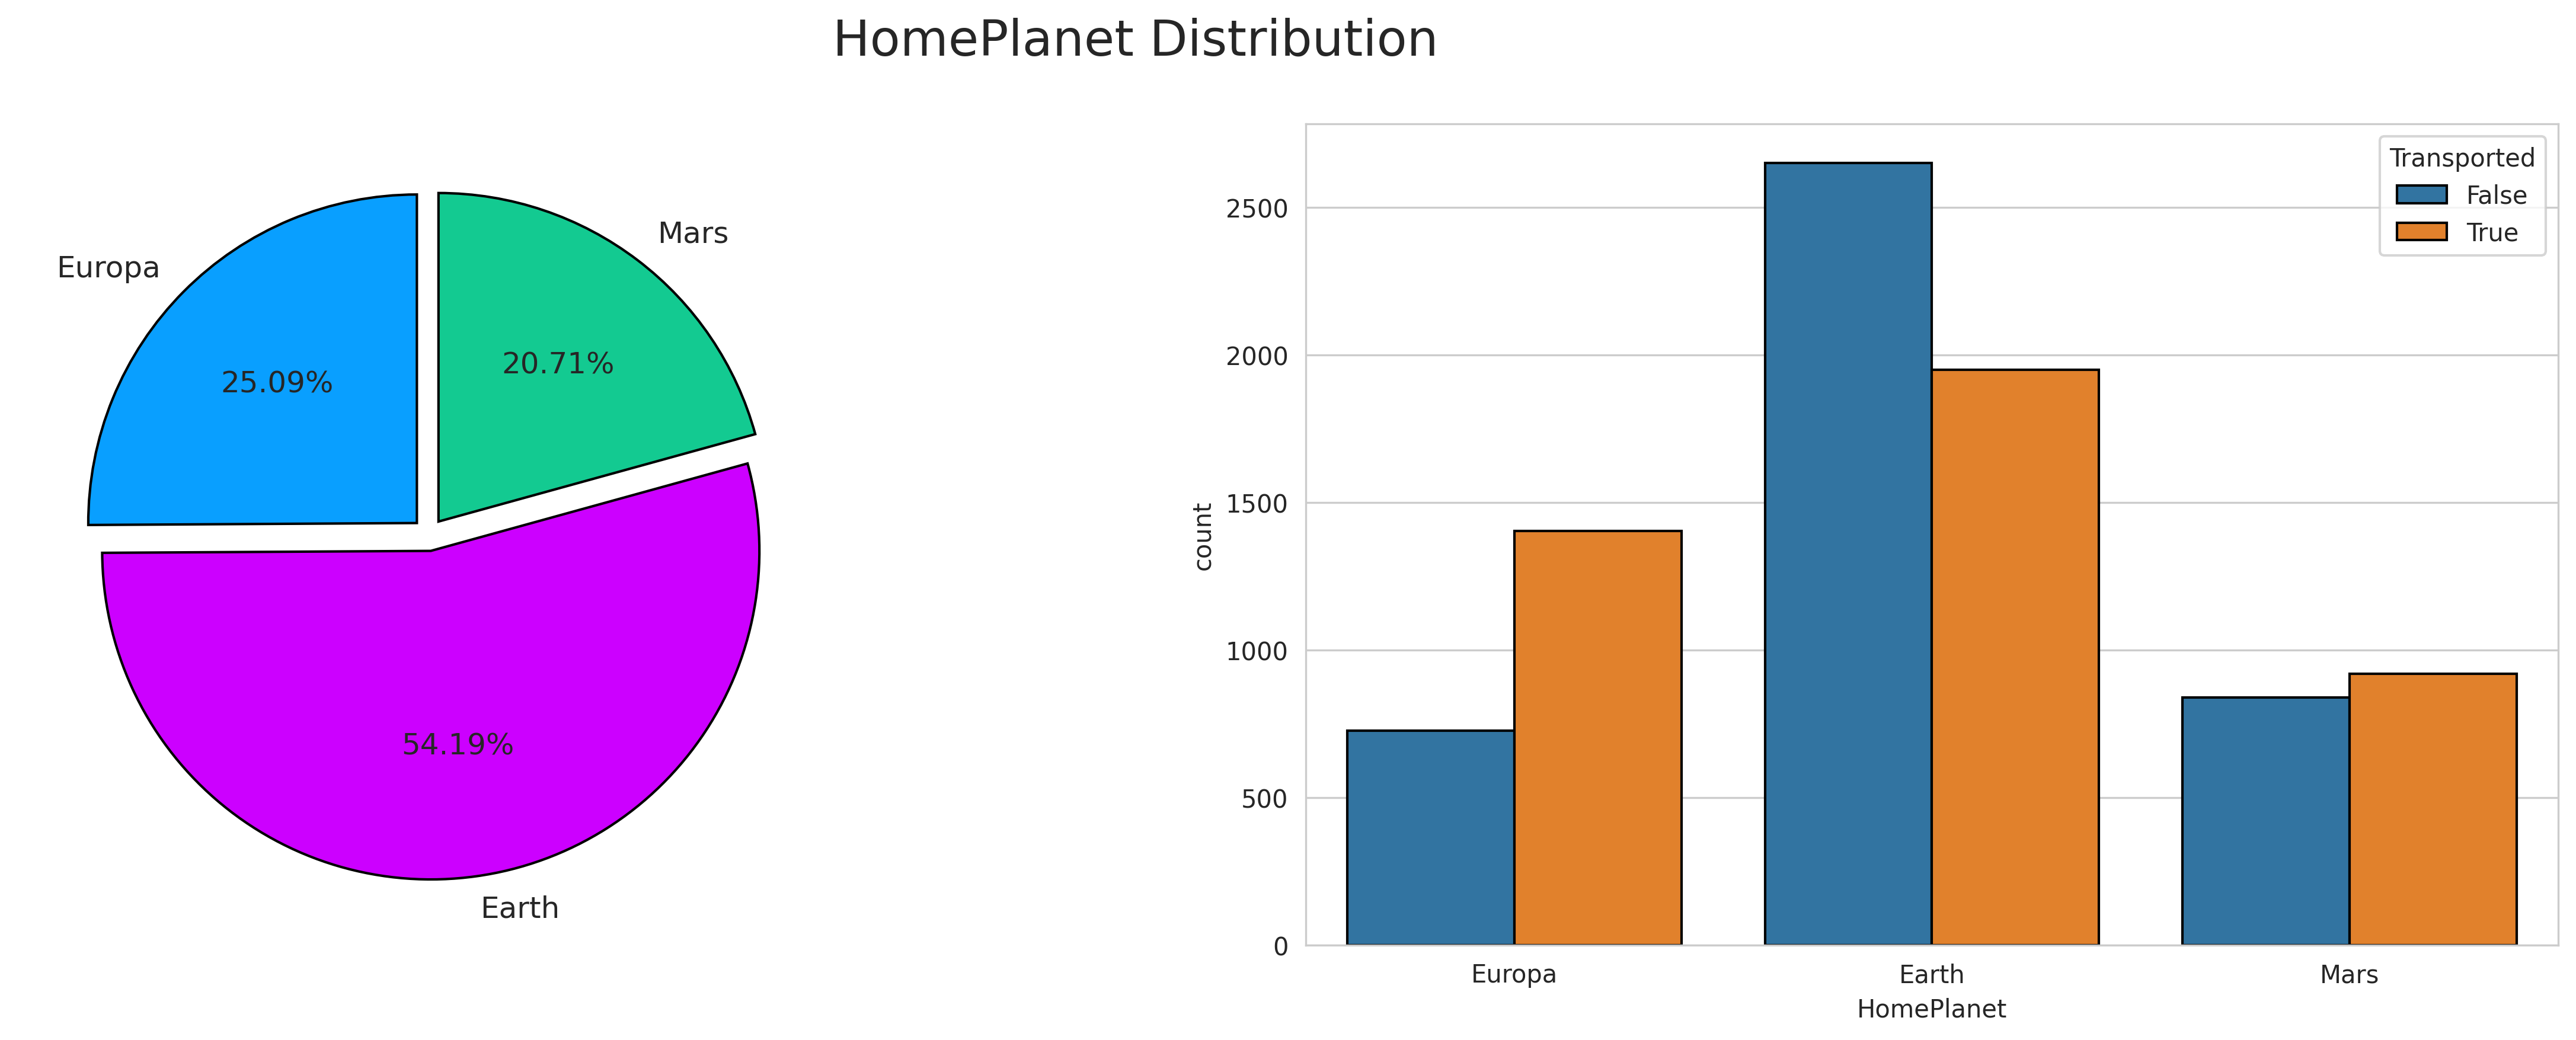

In [708]:
# Make a plot for HomePlanet
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('HomePlanet Distribution', size = 20)

sizes = list(df_train['HomePlanet'].value_counts(sort=False))

labels = df_train['HomePlanet'].dropna().unique()
colors = ['#099FFF', '#CC00FF', '#13CA91']
explode = (0.05,0.05,0.05)

ax[0].pie(sizes, colors=colors, explode=explode, startangle=90, labels=labels,
          autopct='%1.2f%%', pctdistance=0.6, textprops={'fontsize':12},
          wedgeprops = {"edgecolor":"black", 'linewidth':1, 'antialiased': True})
sns.countplot(x='HomePlanet', data=df_train, hue='Transported', ax=ax[1], edgecolor = "black")

print('HomePlanet Distribution:-')
data = pd.DataFrame(df_train['HomePlanet'].value_counts()).reset_index().rename(columns={'index': 'HomePlanet', 'HomePlanet':'Count'})
print(data)
plt.gcf().set_dpi(300)
plt.show()

In [709]:
cor_fun('HomePlanet')

,Earth,Europa,Mars
% HomePlanet,54.192181,25.094206,20.713613
% HomePlanet Transported,45.637427,32.842105,21.520468
Difference,-8.554754,7.747899,0.806855


***Observations***

+ More than half are from Earth
+ The remaining is split almost equally between Europa and Mars
+ People from Earth were transported 8% less
+ People from Europa were transfored 8% more

CryoSleep Distribution:-
   CryoSleep  Count
0      False   5439
1       True   3037


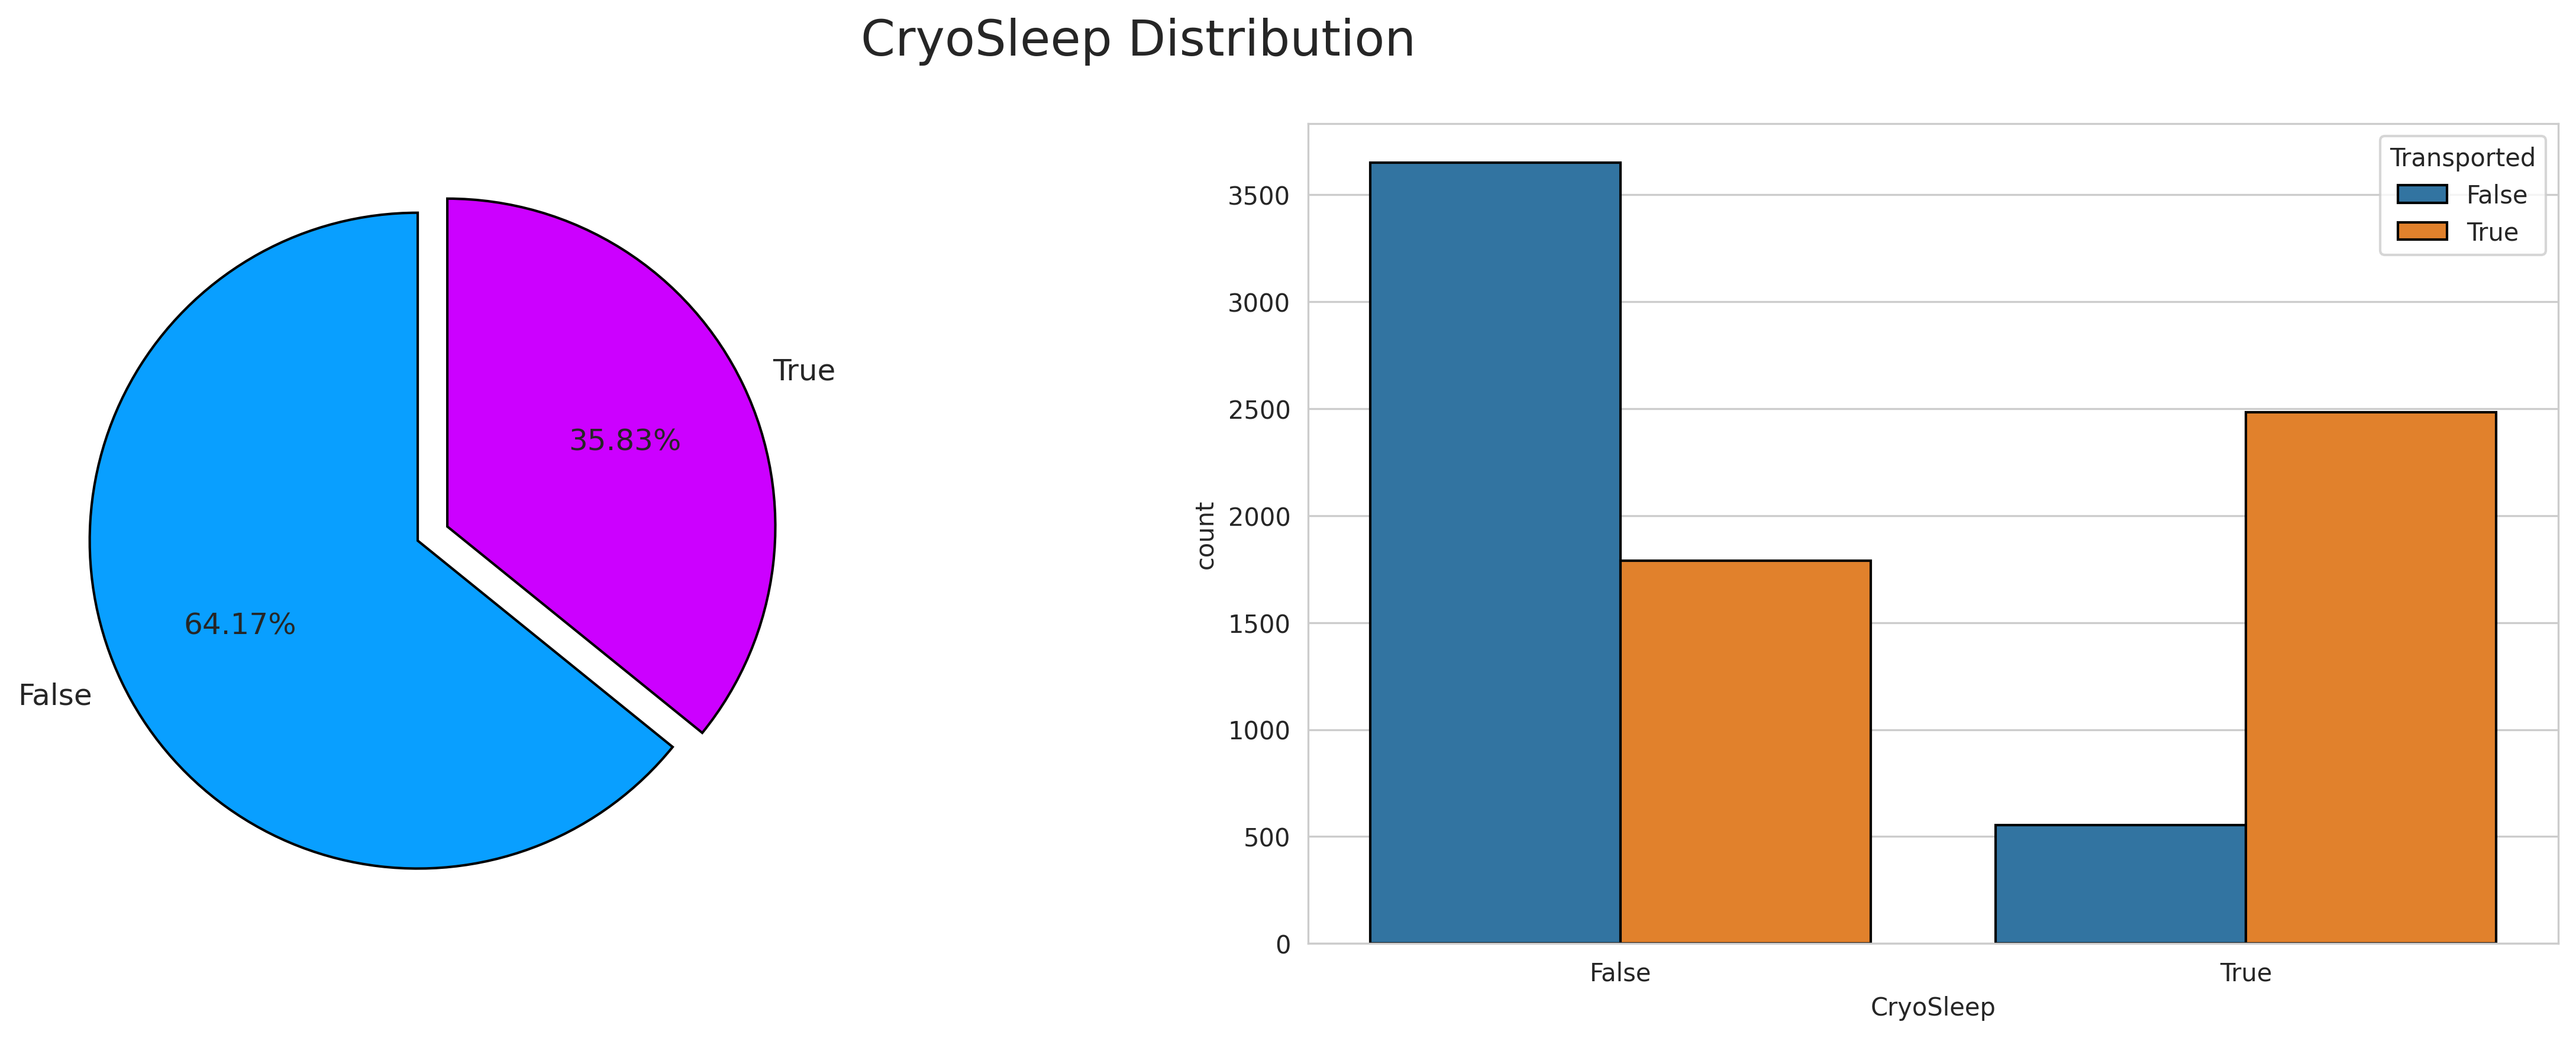

In [710]:
# Make a plot for CryoSleep
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('CryoSleep Distribution', size = 20)

sizes = list(df_train['CryoSleep'].value_counts(sort=False))

labels = df_train['CryoSleep'].dropna().unique()
colors = ['#099FFF', '#CC00FF']
explode = (0.05,0.05)

ax[0].pie(sizes, colors=colors, explode=explode, startangle=90, labels=labels,
          autopct='%1.2f%%', pctdistance=0.6, textprops={'fontsize':12},
          wedgeprops = {"edgecolor":"black", 'linewidth':1, 'antialiased': True})

sns.countplot(x='CryoSleep', data=df_train, hue='Transported', ax=ax[1], edgecolor = "black")

print('CryoSleep Distribution:-')
data = pd.DataFrame(df_train['CryoSleep'].value_counts()).reset_index().rename(columns={'index': 'CryoSleep', 'CryoSleep':'Count'})
print(data)
plt.gcf().set_dpi(300)
plt.show()

In [711]:
cor_fun('CryoSleep')

,False,True
% CryoSleep,64.169420,35.830580
% CryoSleep Transported,41.877341,58.122659
Difference,-22.292079,22.292079


***Observations***

+ slightly imblanced, almost double the count for False than for True

+ **About 2/3 of people were not in CryoSleep**

Destination Distribution:-
     Destination  Count
0    TRAPPIST-1e   5915
1    55 Cancri e   1800
2  PSO J318.5-22    796


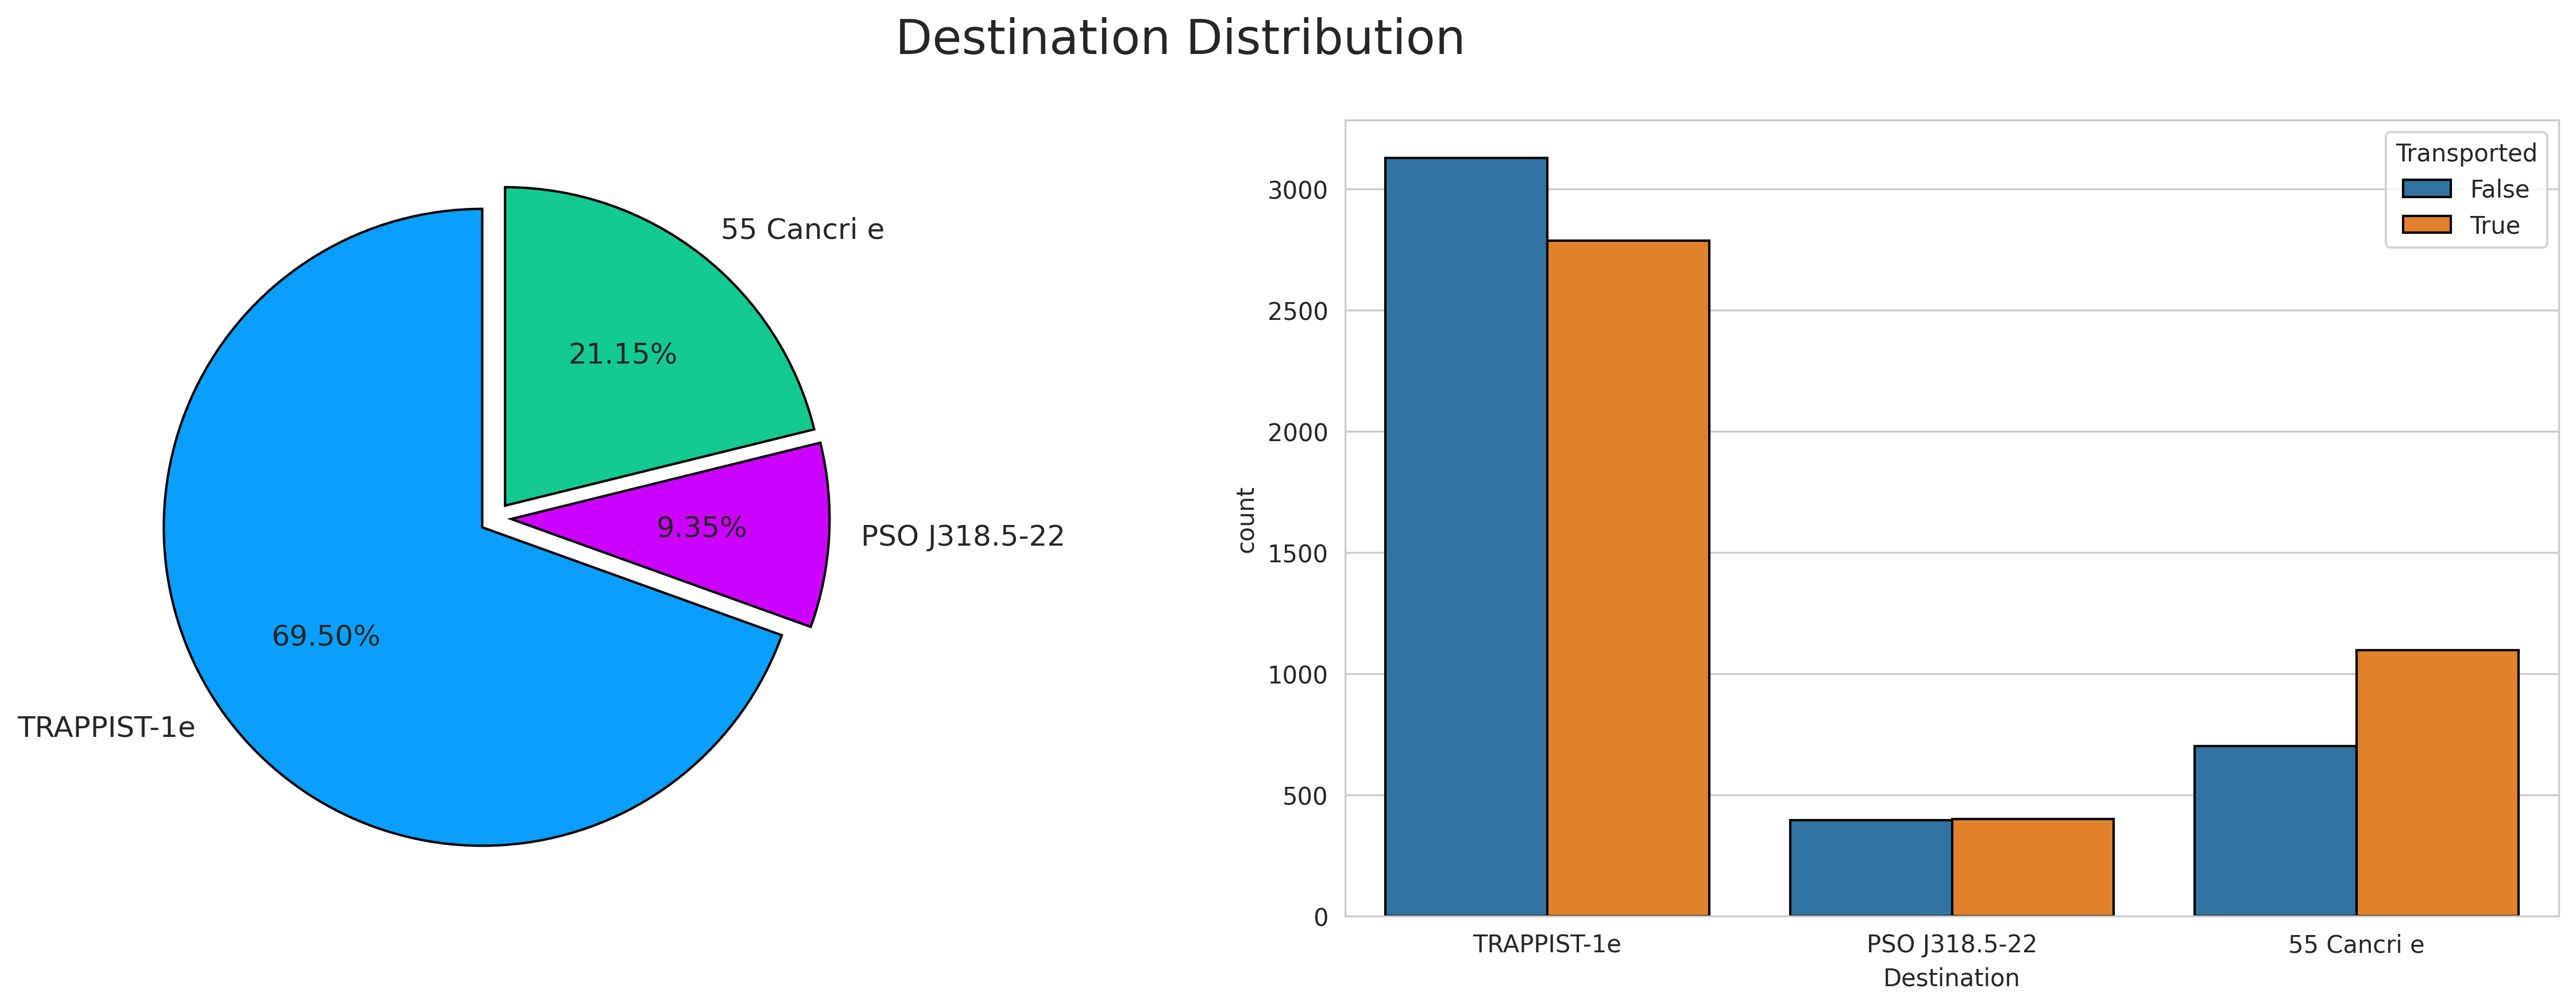

In [712]:
# Make a plot for Destination
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('Destination Distribution', size = 20)

sizes = list(df_train['Destination'].value_counts(sort=False))

labels = df_train['Destination'].dropna().unique()
colors = ['#099FFF', '#CC00FF', '#13CA91']
explode = (0.05,0.05,0.05)

ax[0].pie(sizes, colors=colors, explode=explode, startangle=90, labels=labels,
          autopct='%1.2f%%', pctdistance=0.6, textprops={'fontsize':12},
          wedgeprops = {"edgecolor":"black", 'linewidth':1, 'antialiased': True})

sns.countplot(x='Destination', data=df_train, hue='Transported', ax=ax[1], edgecolor = "black")

print('Destination Distribution:-')
data = pd.DataFrame(df_train['Destination'].value_counts()).reset_index().rename(columns={'index': 'Destination', 'Destination':'Count'})
print(data)
plt.gcf().set_dpi(300)
plt.show()

In [713]:
cor_fun('Destination')

,TRAPPIST-1e,55 Cancri e,PSO J318.5-22
% Destination,69.498296,21.149101,9.352603
% Destination Transported,65.025665,25.618292,9.356043
Difference,-4.472631,4.469191,0.003440


***Observations***

+ Destination - TRAPPIST-1e makes up the majority, 55 Cancri e and PSO J318.5-22 are under represented.  **dimension reduction**
+ Those going to Trappist shows 4% less being transported
+ Those going to Cancri show 4% higher porportion being transported
+ No change for PSO **Dimension Reduction**

VIP Distribution:-
     VIP  Count
0  False   8291
1   True    199


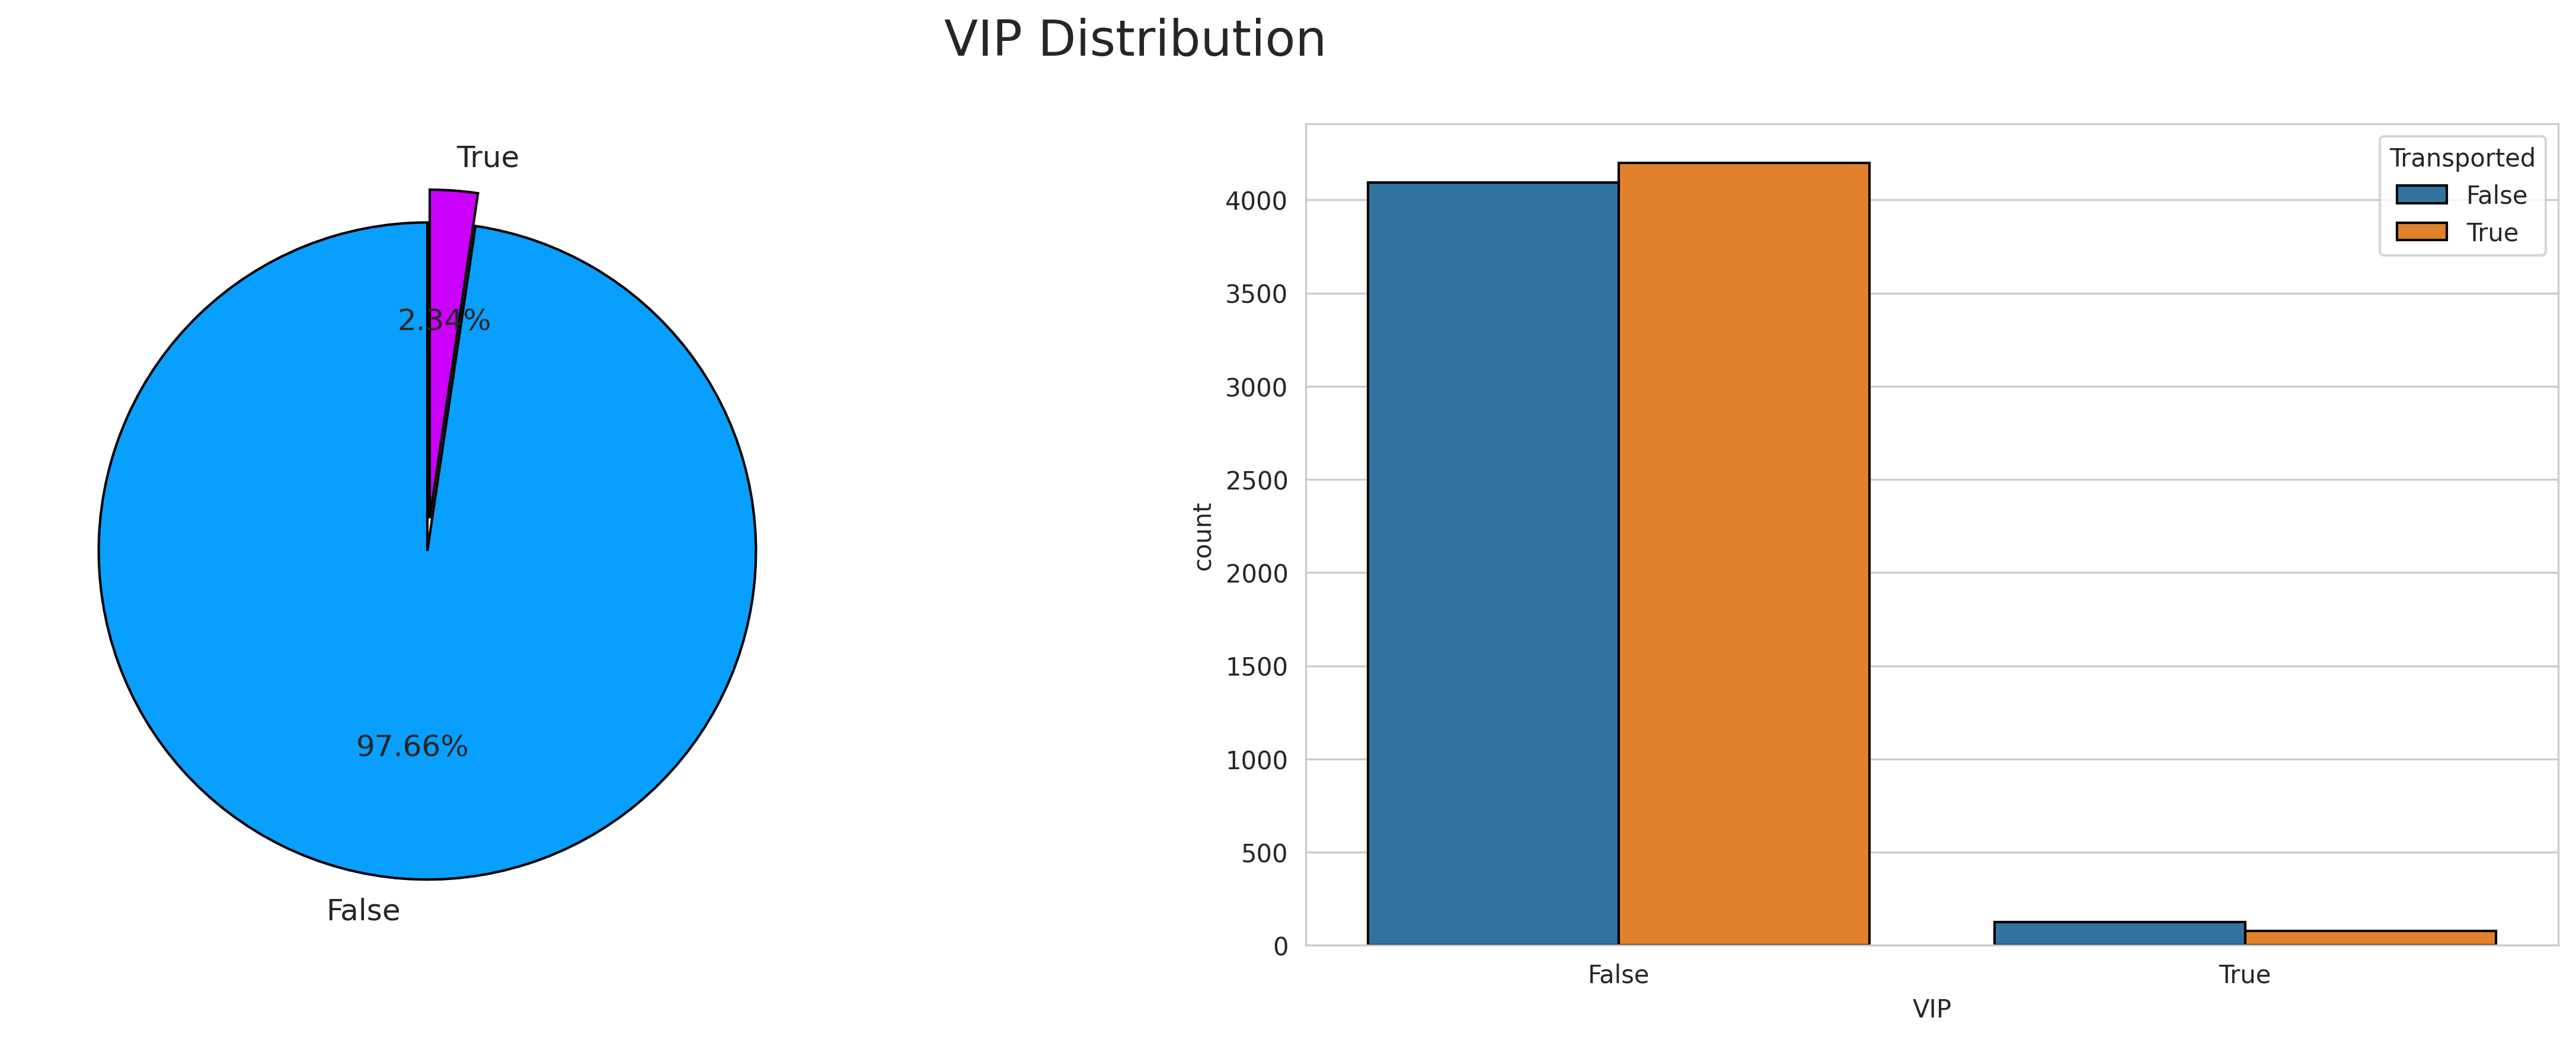

In [714]:
# Make a plot for VIP
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('VIP Distribution', size = 20)

sizes = list(df_train['VIP'].value_counts(sort=False))

labels = df_train['VIP'].dropna().unique()
colors = ['#099FFF', '#CC00FF']
explode = (0.05,0.05)

ax[0].pie(sizes, colors=colors, explode=explode, startangle=90, labels=labels,
          autopct='%1.2f%%', pctdistance=0.6, textprops={'fontsize':12},
          wedgeprops = {"edgecolor":"black", 'linewidth':1, 'antialiased': True})

sns.countplot(x='VIP', data=df_train, hue='Transported', ax=ax[1], edgecolor = "black")

print('VIP Distribution:-')
data = pd.DataFrame(df_train['VIP'].value_counts()).reset_index().rename(columns={'index': 'VIP', 'VIP':'Count'})
print(data)
plt.gcf().set_dpi(300)
plt.show()

In [715]:
cor_fun('VIP')

,False,True
% VIP,97.656066,2.343934
% VIP Transported,98.221806,1.778194
Difference,0.565740,-0.565740


***observations***

+ VIP - large imabalance,  True only represents 200 rows.

In [717]:
# Column with Numerical Variables
print("Numerical Variables")
numerical_variables = df_train._get_numeric_data().columns
for col in numerical_variables:
    print(col)

Numerical Variables
Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
Transported


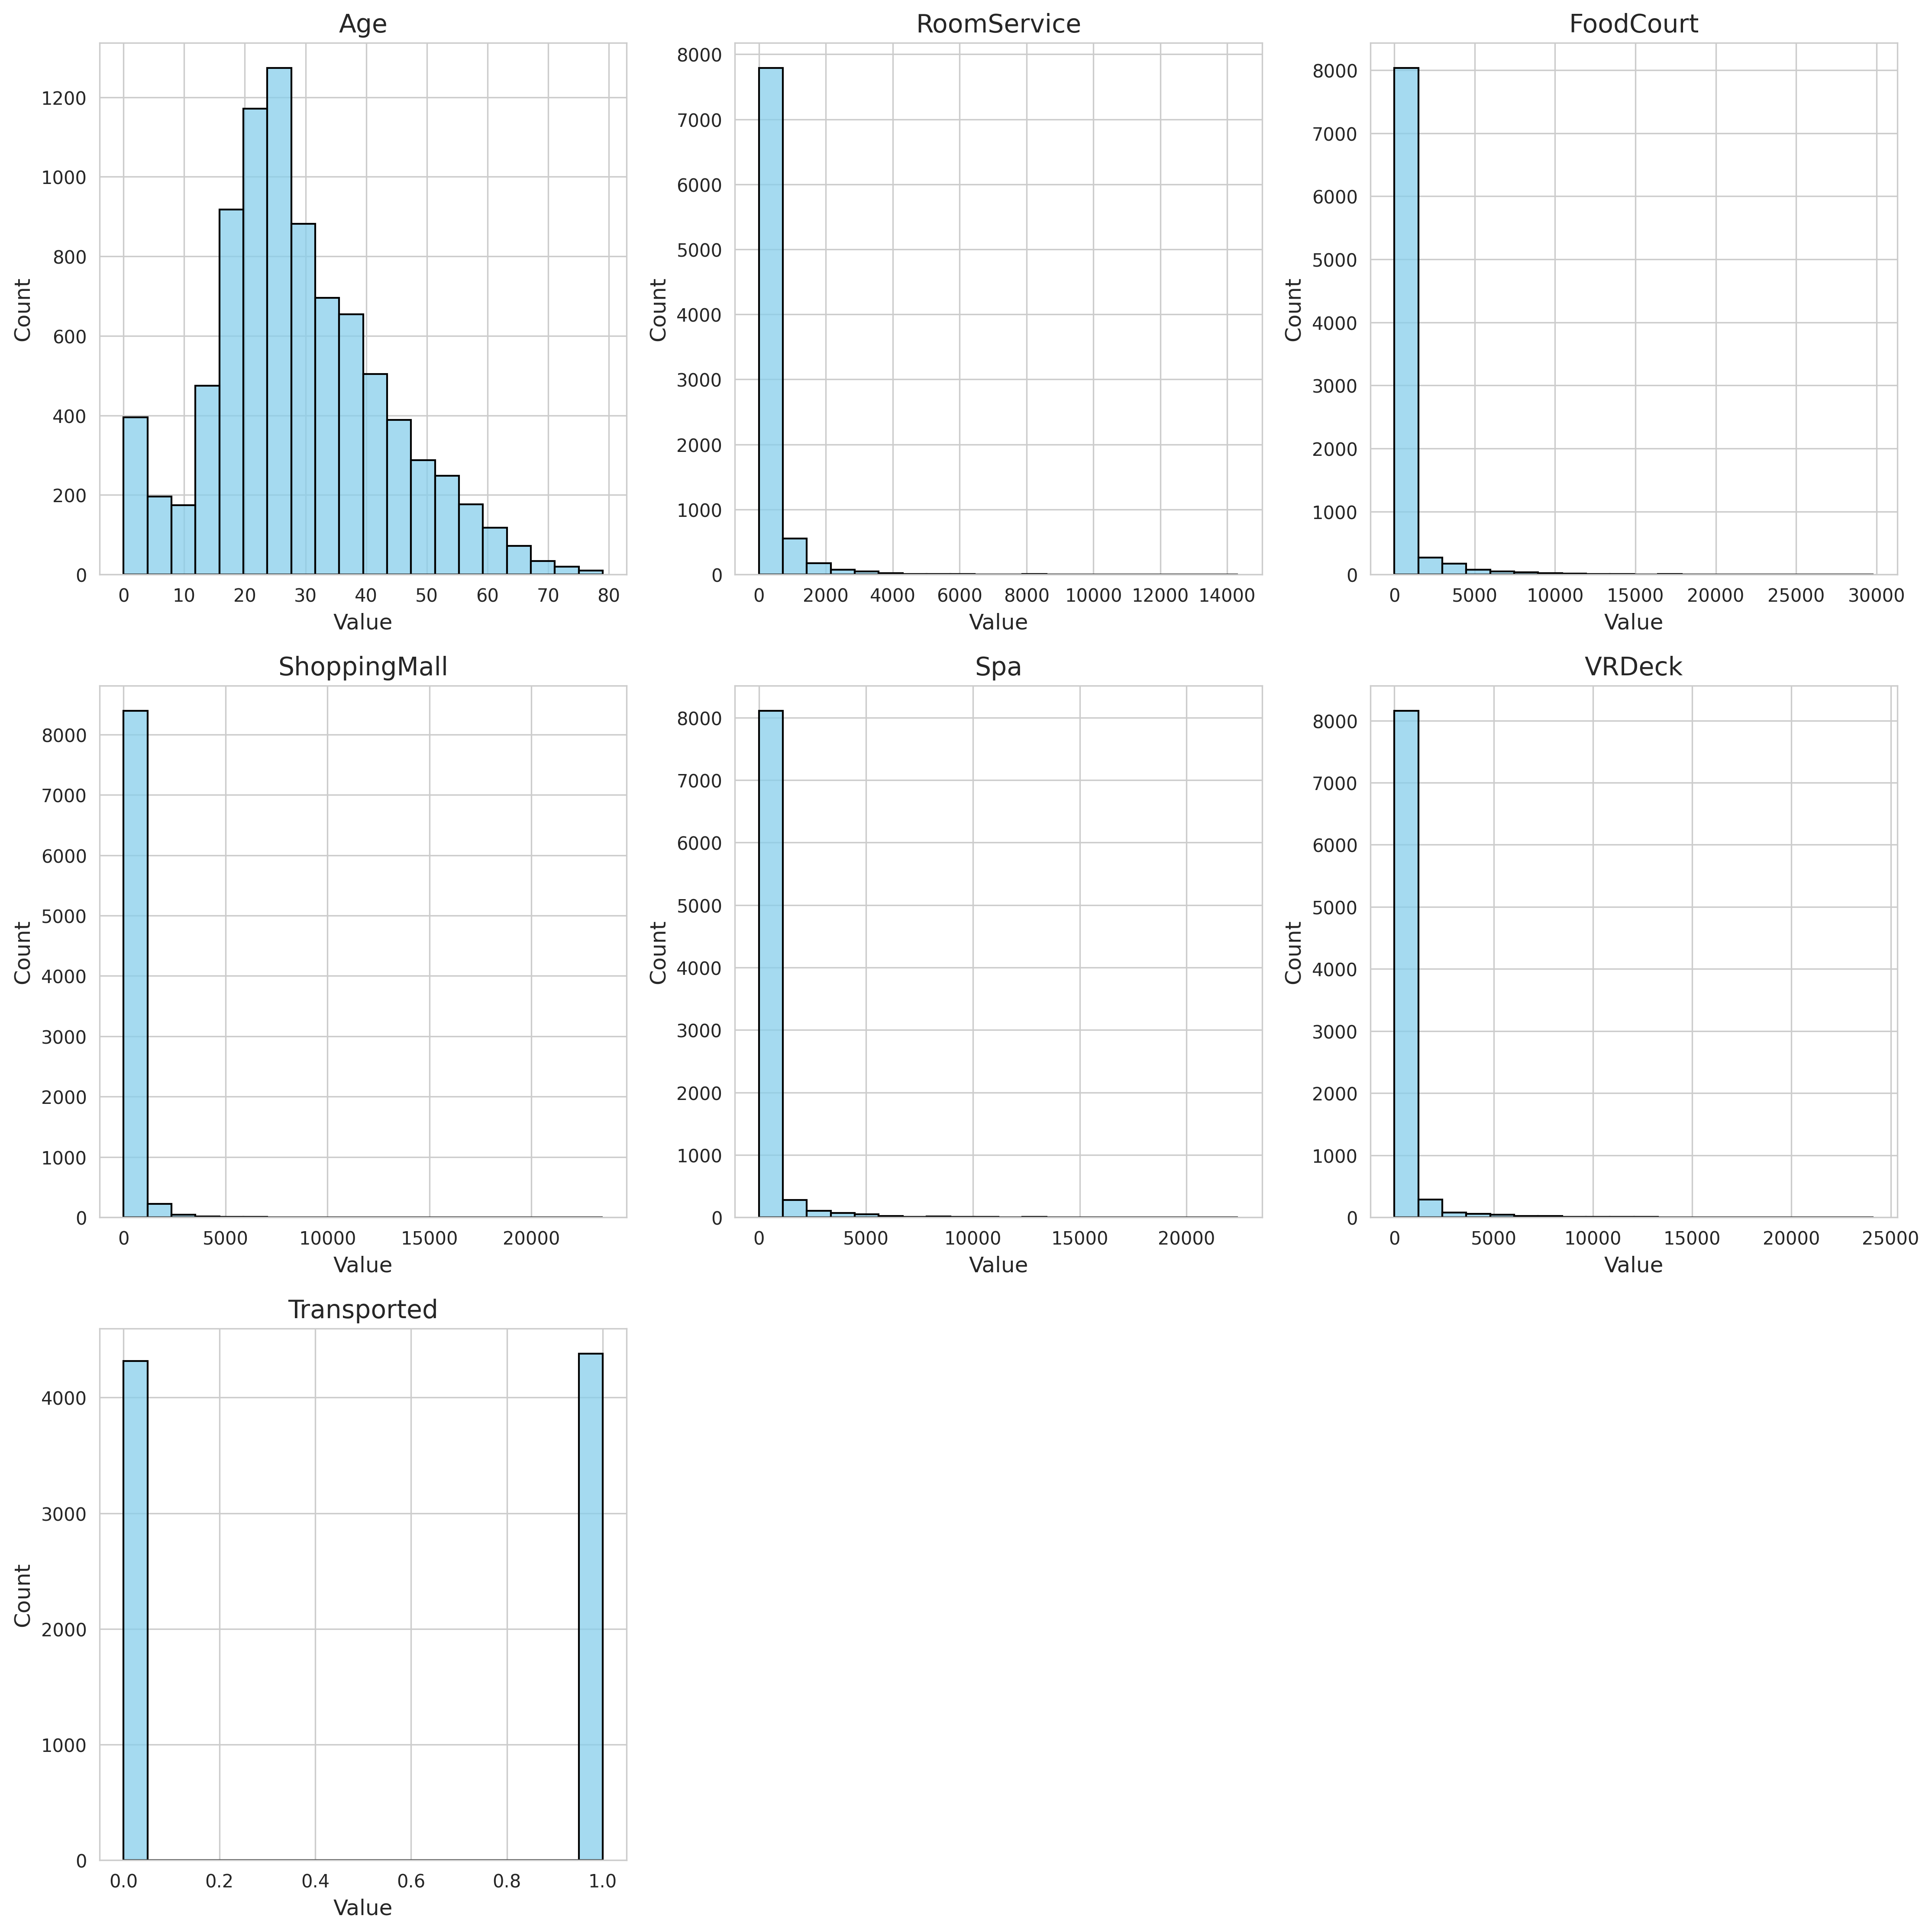

In [658]:
# Set seaborn style
sns.set_style("whitegrid")

# Convert numerical_variables to list if it's not already a list
numerical_variables = list(numerical_variables)

# Determine the number of rows and columns for subplots
num_vars = len(numerical_variables)
num_cols = 3
num_rows = (num_vars - 1) // num_cols + 1

# Set up the figure with subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 5))

# Plot histograms for each numerical variable
for i, num_col in enumerate(numerical_variables):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(df_train[num_col], bins=20, kde=False, ax=axes[row, col], color='skyblue', edgecolor='black')
    axes[row, col].set_title(num_col, fontsize=14)
    axes[row, col].set_xlabel('Value', fontsize=12)
    axes[row, col].set_ylabel('Count', fontsize=12)
    axes[row, col].tick_params(axis='both', labelsize=10)

# Remove any empty subplots
for i in range(num_vars, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.gcf().set_dpi(300)
plt.show()

# Data Imputation and Feature Engineering on Train & Test Dataset

In [646]:
# Combine the test and train data
df_combine = [df_train,df_test]

In [647]:
# Null value filling
for dataset in df_combine:
    dataset['HomePlanet'].fillna(dataset['HomePlanet'].mode()[0],inplace = True)
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)
    dataset['CryoSleep'].fillna(dataset['CryoSleep'].mode()[0],inplace = True)
    dataset['Destination'].fillna(dataset['Destination'].mode()[0],inplace = True)
    dataset['VIP'].fillna(dataset['VIP'].mode()[0],inplace = True)
    dataset['RoomService'].fillna(dataset['RoomService'].median(), inplace = True)
    dataset['FoodCourt'].fillna(dataset['FoodCourt'].median(), inplace = True)
    dataset['ShoppingMall'].fillna(dataset['ShoppingMall'].median(), inplace = True)
    dataset['Spa'].fillna(dataset['Spa'].median(), inplace = True)
    dataset['VRDeck'].fillna(dataset['VRDeck'].median(), inplace = True)

In [648]:
# Check the null value in the train dataset after data imputation
df_train.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [649]:
# Check the null value in the test dataset after data imputation
df_test.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           100
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name             94
dtype: int64

Convert the data of Cabin in some usefull information

In [650]:
# Fill the null value in Cabin column
for dataset in df_combine:
    dataset['Cabin'].fillna('Z/9999/Z', inplace=True)

In [651]:
# Create the new column of deck, num and side column from Cabin column
for dataset in df_combine:
    dataset['deck'] = dataset['Cabin'].apply(lambda x:str(x)[:1])
    dataset['num'] = dataset['Cabin'].apply(lambda x:x.split('/')[1])
    dataset['num'] = dataset['num'].astype(int)
    dataset['side'] = dataset['Cabin'].apply(lambda x:str(x)[-1:])
    dataset['deck'].fillna(dataset['deck'].mode()[0],inplace=True)
    dataset['num'].fillna(dataset['num'].mode()[0],inplace=True)
    dataset['side'].fillna(dataset['side'].mode()[0],inplace=True)

In [652]:
# Check the co-relation of differnt deck wrt to Transported
df_train[['deck','Transported']].groupby(['deck'],as_index=False).mean().sort_values(by='Transported',ascending=False)

,deck,Transported
1,B,0.734275
2,C,0.680054
6,G,0.516217
8,Z,0.502513
0,A,0.496094
5,F,0.439871
3,D,0.433054
4,E,0.357306
7,T,0.200000


From above obsevation deck can be grouped as (B,C)=1 (G,Z,A)=2 (F,D)=3 (E)=4 and (T)=5

In [653]:
deck_mapping = {"B": 1, "C": 1, "G": 2,"Z": 2, "A": 2, "F": 3, "D": 3, "E": 4, "T": 5}

for dataset in df_combine:
    dataset['deck'] = dataset['deck'].map(deck_mapping)

df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,deck,num,side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,3,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,2,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,2,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,3,1,S


In [654]:
# Apply label encoding for HomePlanet, Destination, VIP & CryoSleep, and side column
for dataset in df_combine:
    le = LabelEncoder()
    dataset['HomePlanet'] = le.fit_transform(dataset['HomePlanet'])
    dataset['CryoSleep'] = le.fit_transform(dataset['CryoSleep'])
    dataset['Destination'] = le.fit_transform(dataset['Destination'])
    dataset['VIP'] = le.fit_transform(dataset['VIP'])
    dataset['side'] = le.fit_transform(dataset['side'])

In [655]:
# Drop the unnecessary columns from train and test dataset
for dataset in df_combine:
  dataset.drop(['PassengerId'], axis=1, inplace=True)
  dataset.drop(['Name'], axis=1, inplace=True)
  dataset.drop(['Cabin'], axis=1, inplace=True)

In [656]:
# Check the null value in the train dataset after data imputation and data cleaning
df_train.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
deck            0
num             0
side            0
dtype: int64

In [657]:
# Check the null value in the test dataset after data imputation and data cleaning
df_test.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
deck            0
num             0
side            0
dtype: int64

# Modelling

1. Train test split of our training data
2. Fit a few models: Logistic Regression, Random Forest, Gradient Boosting, SVM, knn, Naive Bayes
3. Plot the performance of above ML models
4. Save the predictions

1. train test Split

In [600]:
# Train test split of cleaned training data
X = df_train.drop("Transported", axis=1).values
y = df_train["Transported"].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.shape,y_train.shape, X_test.shape, y_test.shape

((6954, 13), (6954,), (1739, 13), (1739,))

2. Fit a few models:
Logistic Regression, Random Forest, Gradient Boosting, Support Vector Classification, k-Nearest Neighbors algorithm, and Gaussian Naive Bayes

Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution.

In [601]:
# Logistic Regression
lg = LogisticRegression()
lg.fit(X_train,y_train)
lg_pred_score = round(lg.score(X_test,y_test)*100, 2)
print('Model Accuracy is', lg_pred_score)

Model Accuracy is 76.37


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Random Forests is one of the most popular. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

In [602]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
rf_pred_score = round(rf.score(X_test,y_test)*100, 2)
print('Model Accuracy is', rf_pred_score)

Model Accuracy is 79.64


Gradient Boosting is a functional gradient algorithm that repeatedly selects a function that leads in the direction of a weak hypothesis or negative gradient so that it can minimize a loss function. Gradient boosting classifier combines several weak learning models to produce a powerful predicting model.

In [603]:
# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
gb_pred_score = round(gb.score(X_test,y_test)*100, 2)
print('Model Accuracy is', gb_pred_score)

Model Accuracy is 79.82


Support Vector Machines which are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier.

In [604]:
# Support Vector Classification
svc = SVC()
svc.fit(X_train,y_train)
svc_pred_score = round(svc.score(X_test,y_test)*100, 2)
print('Model Accuracy is', svc_pred_score)

Model Accuracy is 76.94


In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

In [605]:
# k-Nearest Neighbors algorithm
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)
knn_pred_score = round(svc.score(X_test,y_test)*100, 2)
print('Model Accuracy is', knn_pred_score)

Model Accuracy is 76.94


Naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem.

In [606]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train,y_train)
acc_gaussian = round(gaussian.score(X_test,y_test)*100, 2)
print('Model Accuracy is', acc_gaussian)

Model Accuracy is 70.16


3. Plot the performance of above ML models

In [621]:
# Create the DataFrame to show the result of different ML models
df = pd.DataFrame(dict(Model=['Logistic Regression',
                              'Random Forest',
                              'Gradient Boosting',
                              'SVM', 'k-Nearest Neighbor', 'Gaussian Naive Bayes'],
                       Accuracy=[lg_pred_score, rf_pred_score, gb_pred_score, svc_pred_score,
                                 knn_pred_score, acc_gaussian]))
df

,Model,Accuracy
0,Logistic Regression,76.37
1,Random Forest,79.64
2,Gradient Boosting,79.82
3,SVM,76.94
4,k-Nearest Neighbor,76.94
5,Gaussian Naive Bayes,70.16


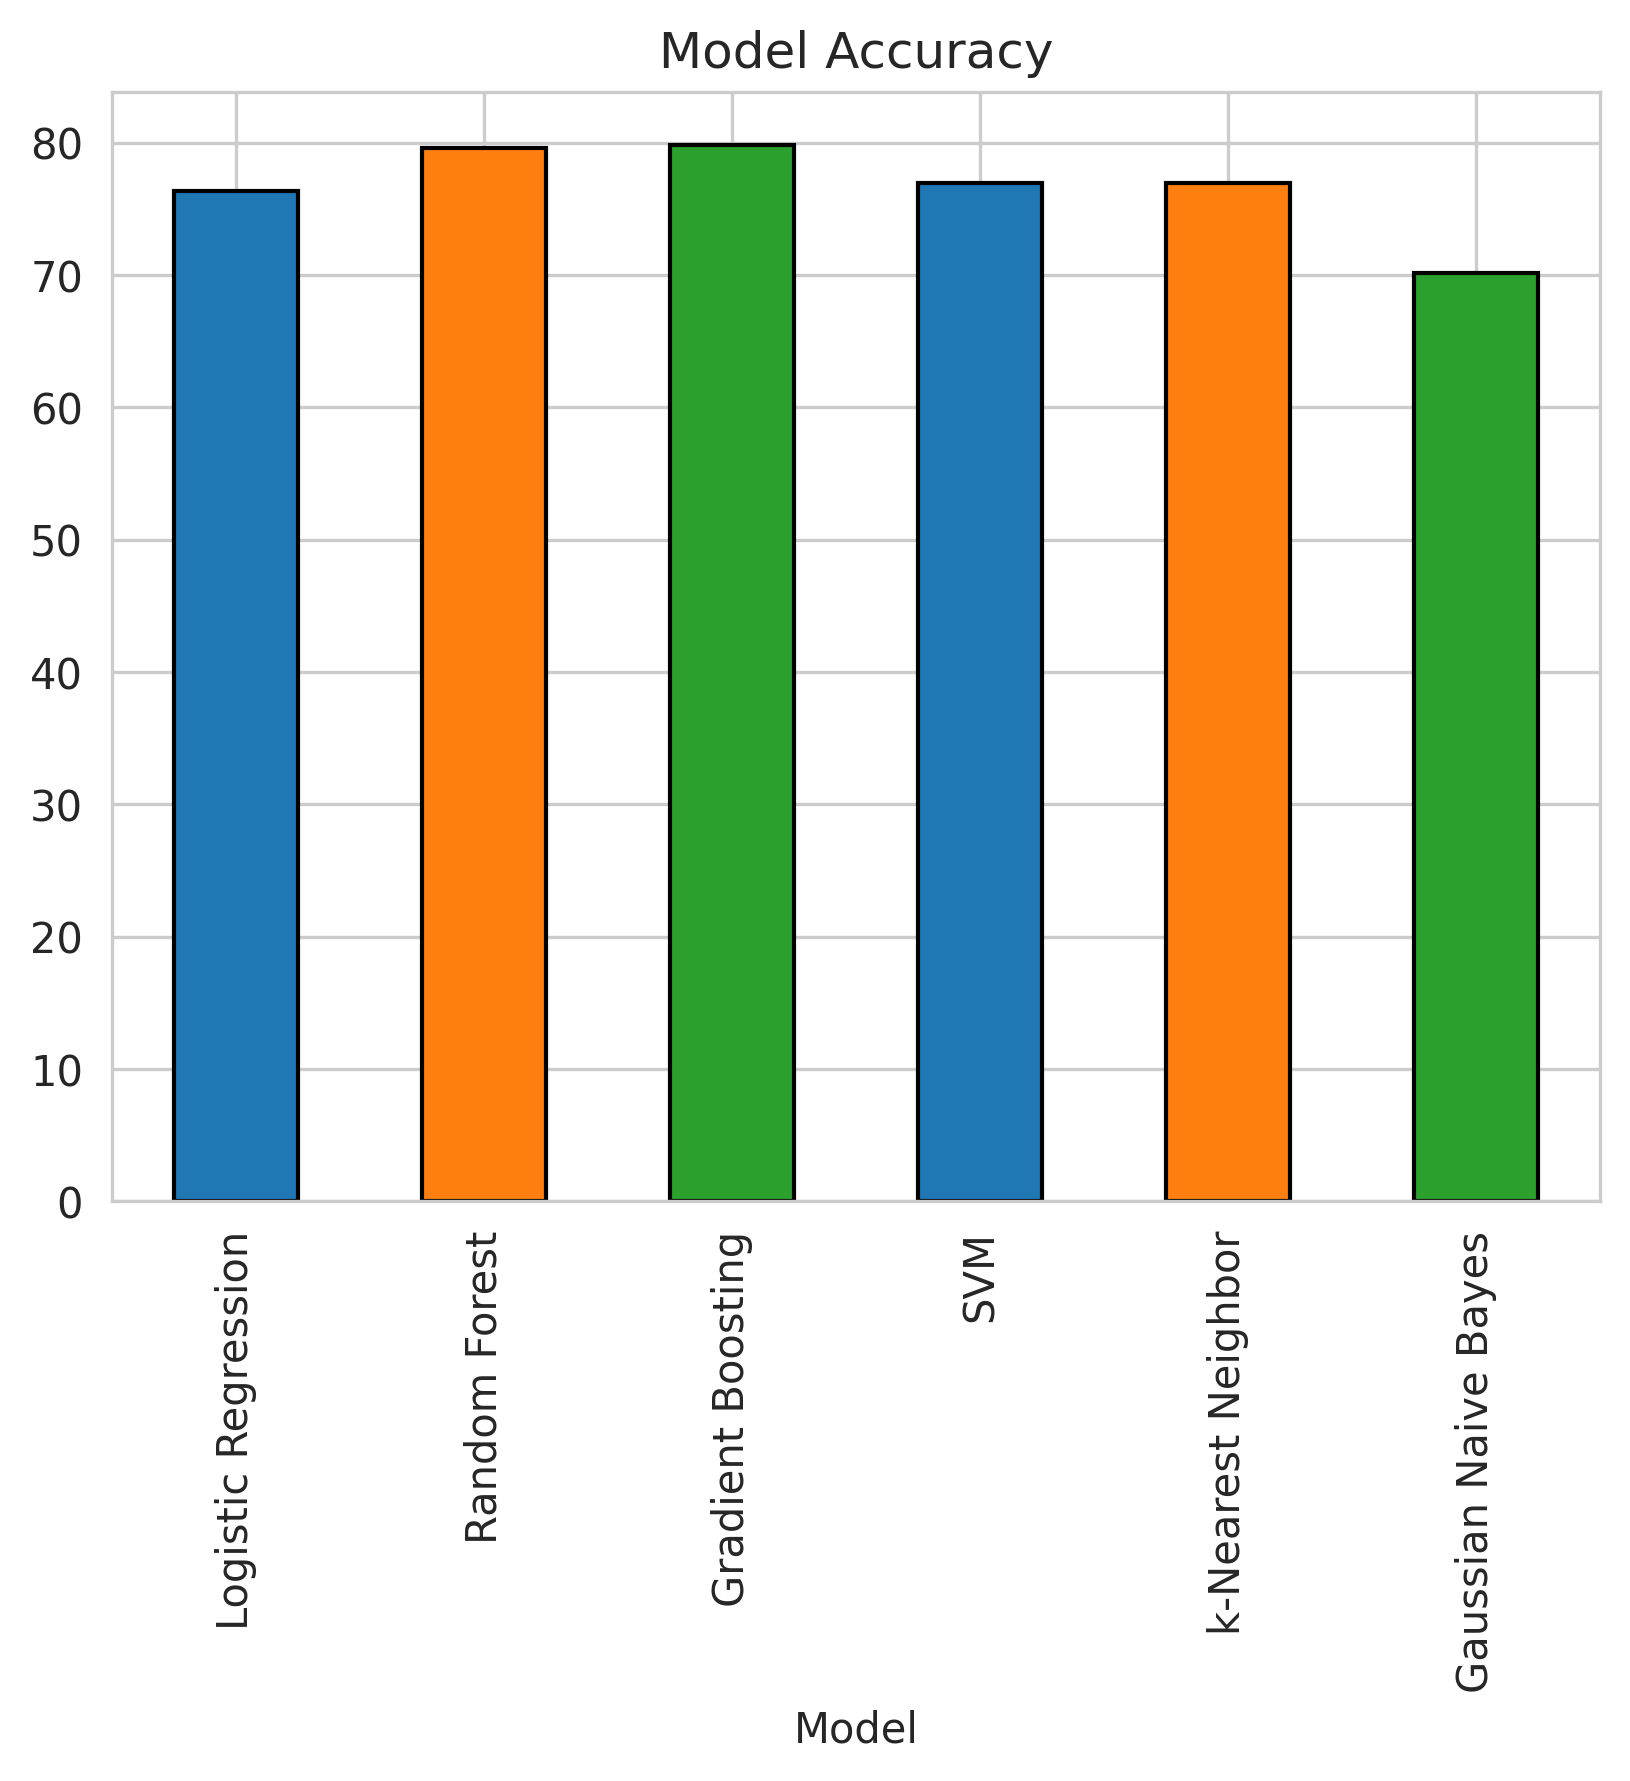

In [622]:
# Plotting the bar graph to show the accuracy of above models
df.plot(kind='bar',x='Model',y='Accuracy',title='Model Accuracy',legend=False,
        color=['#1F77B4', '#FF7F0E', '#2CA02C'], edgecolor="black")
plt.gcf().set_dpi(300);

# Prediction on test dataset

Use the model which has higher accuracy for Prediction on Test Dataset

In [610]:
# Prediction
X_test = df_test.values
y_pred = gb.predict(X_test)

In [611]:
# Check the shape of predicted values
y_pred.shape

(4277,)

4. Save the predictions

In [492]:
# Create a data frame with PassengerId as the input feature and Transported as the output feature
df_submission = pd.DataFrame({'PassengerId':df_test1['PassengerId'], 'Transported':y_pred})

In [493]:
# Save the DataFrame to a CSV file
df_submission.to_csv('submission-3.csv', index=False)